In [11]:
%load_ext autoreload
%autoreload 2

import numpy as np
import tqdm
from skimage import measure
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

from keras_transfer_learning import dataset
from keras_transfer_learning.data import compare

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
configs = [
    {
        'name': 'cytogen_high-noise',
        'data': {
            'name': 'cytogen',
            'data_dir': 'data/cytogen_hl60_high-noise',
            'normalizer': 'min-max'
        }
    },
    {
        'name': 'cytogen_low-noise',
        'data': {
            'name': 'cytogen',
            'data_dir': 'data/cytogen_hl60_low-noise',
            'normalizer': 'min-max'
        }
    },
    {
        'name': 'stardist_dsb2018',
        'data': {
            'name': 'stardist-dsb2018',
            'data_dir': 'data/stardist-dsb2018',
            'normalizer': 'min-max'
        }
    },
    {
        'name': 'cityscapes',
        'data': {
            'name': 'cityscapes',
            'data_dir': 'data/cityscapes',
            'normalizer': 'min-max'
        }
    }
]

In [3]:
datasets = [dataset.Dataset(c).create_test_dataset()[0] for c in configs]

In [4]:
def comparion_matrix(metric):
    num_datasets = len(datasets)
    matrix = np.empty((num_datasets, num_datasets))
    
    comparisons = []
    for i in range(num_datasets):
        for j in range(i, num_datasets):
            comparisons.append((i, j))

    for i, j in tqdm.tqdm(comparisons):
        val = metric(datasets[i], datasets[j])
        matrix[i, j] = val
        matrix[j, i] = val
    return matrix

In [5]:
sliced_wasserstein_matrix = comparion_matrix(
    lambda a, b: np.mean(compare.sliced_wasserstein_pyramids(a, b, n_patches=2**14)))
print(sliced_wasserstein_matrix)

100%|██████████| 10/10 [03:51<00:00, 35.38s/it]


[[0.00023123 0.00848947 0.01236096 0.01109655]
 [0.00848947 0.00010894 0.00523103 0.00452786]
 [0.01236096 0.00523103 0.00021469 0.00179551]
 [0.01109655 0.00452786 0.00179551 0.00023308]]


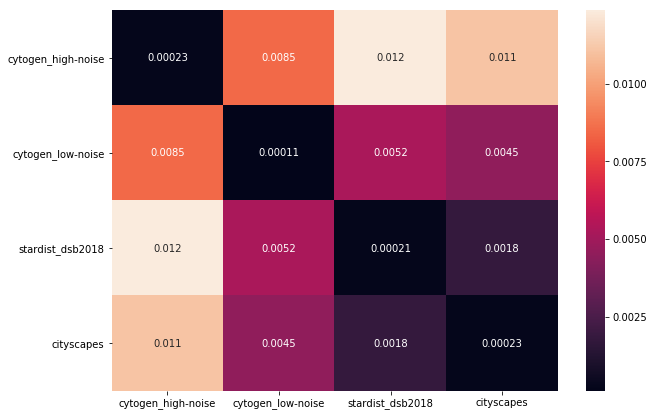

In [13]:
names = [c['name'] for c in configs]
df_cm = pd.DataFrame(sliced_wasserstein_matrix, index=names, columns=names)
plt.figure(figsize=(10,7))
sn.heatmap(df_cm, annot=True)
plt.show()

In [12]:
compare.sliced_wasserstein_pyramids(x_dsb2018, x_cityscapes, n_patches=2**15)

[0.0006891679397794555,
 0.0012641336571127518,
 0.001142204288144808,
 0.0039007871251693664]